# Assignment 2 
## Parth Kothari
## Roll No.: 2303121012

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sc_integ
from scipy.integrate import trapz, simps
from scipy.integrate import odeint

## Problem 1 
- Here I have to plot the motion of a planet for different sets of initial condition.
- Assuming Sun is at origin and its motion is not considered.
- $GM_\odot$ = 1 , $M_\odot$ being the mass of sun.

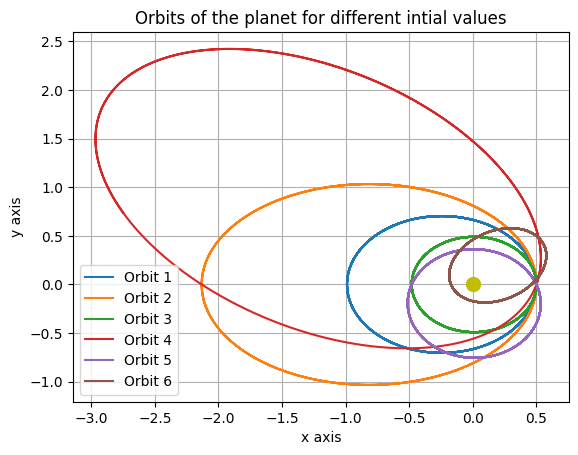

In [2]:
def orbit_equation(para,t): # defined my equation to solve using Odient
    x,y,vx,vy = para
    r_squared = x**2 + y**2
    r_cubed = r_squared * np.sqrt(r_squared)
    
    dxdt = vx
    dydt = vy
    dvxdt = - x / r_cubed
    dvydt = - y / r_cubed
    return [dxdt, dydt, dvxdt, dvydt]

# Initial conditions
 #x0 = np.array([0.5,0.5,0.5,0.5,0.5,0.5])
 #y0 = np.array([0,0,0,0,0,0.50])
 #v0x = np.array([0,0,0,0.50,-0.50,-0.50])
 #v0y = np.array([1.63,1.80,1.40,1.80,1.40,0.50])
Boundary_conditions = (
                       [0.5,0.0,0.0,1.63],
                       [0.5,0.0,0.0,1.80],
                       [0.5,0.0,0.0,1.40],
                       [0.5,0.0,0.50,1.80],
                       [0.5,0.0,-0.50,1.40],
                       [0.5,0.50,-0.50,0.50] )
 
# time values for the odient
t = np.linspace(0, 30, 10000)

# Solving the equation
index = [0,1,2,3,4,5]


plt.plot(0,0,'yo',markersize= 10)
plt.title('Orbits of the planet for different intial values')

for i in index:
    ODE = odeint(orbit_equation,Boundary_conditions[i],t)
    x = ODE[:,0]
    y = ODE[:,1]
    plt.plot(x, y, label=f'Orbit {i+1}')
    
    
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.grid()
plt.legend()




## Problem 2

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

[0.5, 0.3333333333333333, 0.45969769413186023, 0.30116867893975674]



C:\Users\PAVILION GAMING\AppData\Local\Temp\ipykernel_7200\1703913772.py:59: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


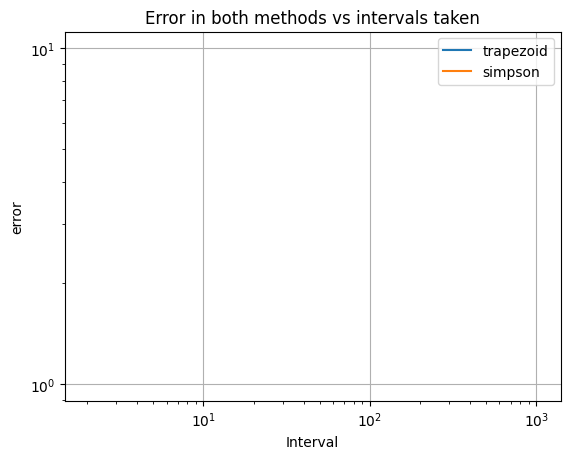

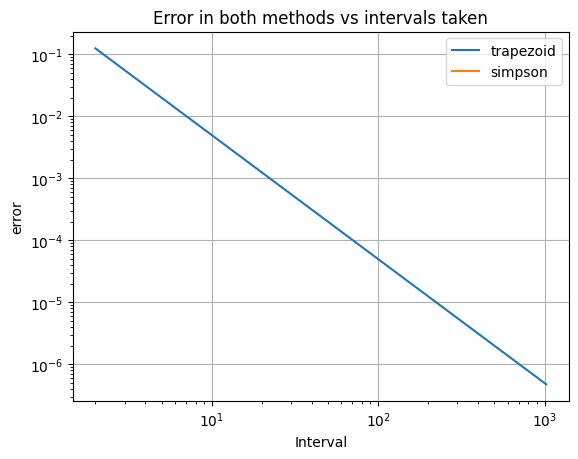

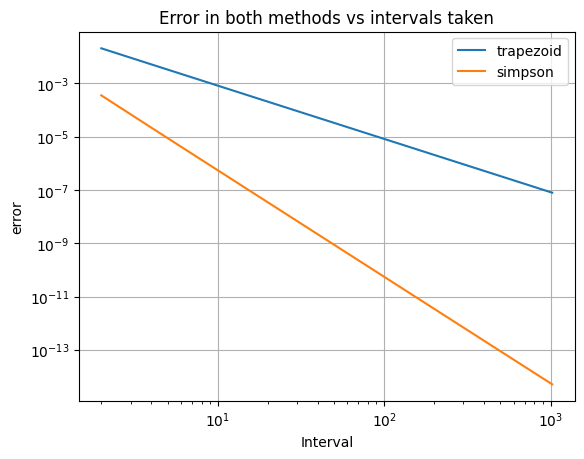

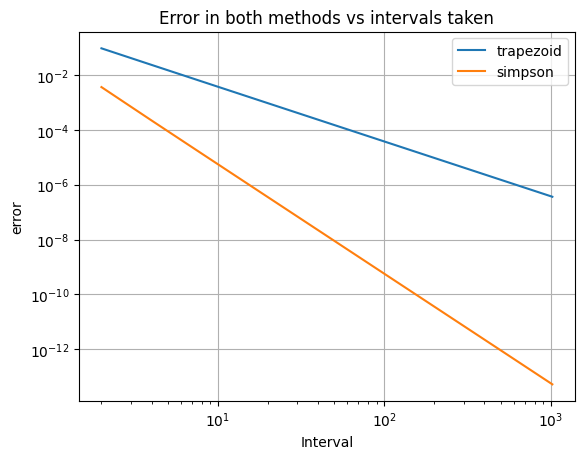

In [3]:
#Trapezoidal function
def trap_func(func,a,b,n):
    x_values = np.linspace(a,b,n+1)
    y_values = func(x_values)
    return trapz(y_values,dx=(b-a)/n)
#Simpsons function with help of scipy
def simp_func(func,a,b,n):
    x_values = np.linspace(a,b,n+1)
    y_values = func(x_values)
    return simps(y_values,dx=(b-a)/n)
# Defining the functions that we need to integrate
def func_1(x):
    return x
def func_2(x):
    return x**2
def func_3(x):
    return  np.sin(x)
def func_4(x):
    return x*np.sin(x)

Functions = [func_1,func_2,func_3,func_4]

# defining intervals
Interval = [2**i for i in range(1,11)]
print(Interval)
print()

# Analytical solutions
anay_values = [0.5, 1/3 , 1 - np.cos(1), np.sin(1) - np.cos(1)]
print(anay_values)
print()

#Calculating integrals and respective error
index_list = [0, 1, 2, 3]
error_trap = []
error_simp = []
for i in index_list:
    trap_error = []
    simp_error = []
    for n in Interval:
        T = trap_func(Functions[i],0,1,n)
        S = simp_func(Functions[i],0,1,n)
        true_value = anay_values[i]
        trap_e = abs(T-true_value)/true_value
        simp_e = abs(S-true_value)/true_value
        trap_error.append(trap_e) 
        simp_error.append(simp_e)
        
    error_trap.append(trap_error)
    error_simp.append(simp_error)
    
# Plotting The errors
for i in index_list:
    plt.plot(Interval,error_trap[i])
    plt.plot(Interval,error_simp[i])
    plt.xlabel('Interval')
    plt.ylabel('error')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(['trapezoid','simpson'])
    plt.title('Error in both methods vs intervals taken')
    plt.grid()
    plt.show()

## Problem 3

In [4]:
def func(x): #defined the function
    return np.sin(x)**2 / x**2
result,error = sc_integ.quad(func,-np.inf,+np.inf)

print(f'The result is: {result}')
print(f'The estimated error in the result is:{error} ')
print(f'The value of the integrand is: π')
error_Int = abs(result - np.pi)/np.pi
print()
print(f'The error between the analytical and numerical value is: ',error_Int)

The result is: 3.1417357698907553
The estimated error in the result is:0.003117551884524783 
The value of the integrand is: π

The error between the analytical and numerical value is:  4.5555333470322475e-05


C:\Users\PAVILION GAMING\AppData\Local\Temp\ipykernel_7200\2488182034.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result,error = sc_integ.quad(func,-np.inf,+np.inf)


### Problem 4 
Function 1 = $x^{2}e^{-x^{2}}$

Function 2 = $\sqrt{1+cos^{2}(x)}$

In [5]:
def func(x):
    return x**2 * np.exp(-x**2)
F,_ = sc_integ.fixed_quad(func,-1,1,n=2)
S,_= sc_integ.fixed_quad(func,-1,1,n=3)
T,_ = sc_integ.fixed_quad(func,-1,1,n=5)

print(f' For Function 1')
print(f'Integral value for Gaussian quadrature method:n=2,',F)
print(f'Integral value for Gaussian quadrature method:n=3,',S)
print(f'Integral value for Gaussian quadrature method:n=5,',T)
print(f'Actual Value of first function: 0.3789446916409847')
print()

def func_2(x):
    return (1 + (np.cos(x)**2) )**0.5
g,_ = sc_integ.fixed_quad(func_2,0,np.pi,n=2)
v,_ = sc_integ.fixed_quad(func_2,0,np.pi,n=3)
h,_ = sc_integ.fixed_quad(func_2,0,np.pi,n=5)
print('For Function 2')
print(f'Integral value for Gaussian quadrature method:n=2,',g)
print(f'Integral value for Gaussian quadrature method:n=3,',v)
print(f'Integral value for Gaussian quadrature method:n=5,',h)
print()
print('actual value of second function via Wolfram alpha is: 3.820197789027712')
print()
act_val = 3.820197789027712
error_2 = (abs(g - act_val )/ act_val) * 100
error_3 = (abs(v - act_val )/ act_val) * 100
error_5 = (abs(h - act_val )/ act_val) * 100
print(f'percentage error between analytical value and quadrature values for function 2:')
print(f'n=2: {error_2}')
print(f'n=3: {error_3}')
print(f'n=5:{error_5}')


 For Function 1
Integral value for Gaussian quadrature method:n=2, 0.47768754038252614
Integral value for Gaussian quadrature method:n=3, 0.3658744240626845
Integral value for Gaussian quadrature method:n=5, 0.37887323886553764
Actual Value of first function: 0.3789446916409847

For Function 2
Integral value for Gaussian quadrature method:n=2, 3.9989762910745297
Integral value for Gaussian quadrature method:n=3, 3.78920542146265
Integral value for Gaussian quadrature method:n=5, 3.8187923611667065

actual value of second function via Wolfram alpha is: 3.820197789027712

percentage error between analytical value and quadrature values for function 2:
n=2: 4.6798231903149485
n=3: 0.8112765169928491
n=5:0.036789400408587004


## Problem 5 


C:\Users\PAVILION GAMING\AppData\Local\Temp\ipykernel_7200\807754598.py:21: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return sc_integ.quad(t,-b,b)[0]


The numerical value of time for the first Two integral is:
For V (x) = αx2/2: 3.141592653589599
For V (x) = exp(αx2/2)−1: 0.4553611867946035

The expected value for first Time period  is:3.141592653589793
Therefore numerical value is quite close to analytical value.



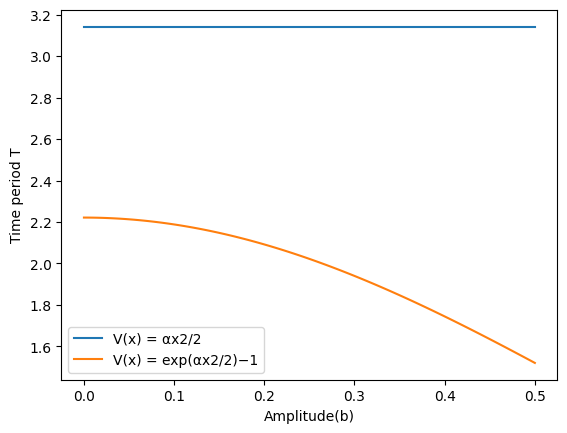

In [6]:
# Defining the first and second potential
def V1(x):
    return alpha*x**2/2
def V2(x):
    return np.exp(alpha*x**2) - 1
    

# Constants of potential
m = 1  #mass
alpha = 4  #constant given

#integration functions:
b = 1 # For simple integral calculations
def Integ1(x):
    return 2*np.sqrt(m/2) * np.sqrt(1/(V1(b)-V1(x)))
def Integ2(x):
    return 2*np.sqrt(m/2) * np.sqrt(1/(V2(b)-V2(x)))

# Now we define a time period that would be integrated 
def Time_period(t):
    return sc_integ.quad(t,-b,b)[0]
# Integration results
X,Y = Time_period(Integ1),Time_period(Integ2)
print(f'''The numerical value of time for the first Two integral is:
For V (x) = αx2/2: {X}
For V (x) = exp(αx2/2)−1: {Y}

The expected value for first Time period  is:{np.pi}
Therefore numerical value is quite close to analytical value.
''')
# PLotting the values for different oscillations
b_diff = np.linspace(0.0001,0.5,100) # Different values of b for plotting the time period
Time_period_1 = []
Time_period_2 = []
for b in b_diff:
    Time_period_1.append(Time_period(Integ1))
    Time_period_2.append(Time_period(Integ2))

#PLotting the time period
plt.plot(b_diff,Time_period_1,label='V(x) = αx2/2')
plt.plot(b_diff,Time_period_2,label='V(x) = exp(αx2/2)−1')
plt.xlabel('Amplitude(b)')
plt.ylabel('Time period T')
plt.legend()
